<a href="https://colab.research.google.com/github/feliperodighero/Machine-Learning-Study/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df = df.dropna()

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

<ipython-input-22-a0b5aa997b95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
df.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
5,False,Adult,UpperMiddle,Normal,Current,Moderate,EggShell,Moderate,SportsCar,Poor,...,Suburb,True,HundredThou,HundredThou,True,TenThou,Poor,True,Thousand,Many
6,False,Senior,UpperMiddle,Normal,Current,Mild,Football,Mild,Economy,Poor,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
7,False,Adult,Prole,Normal,Older,Severe,EggShell,Severe,Economy,Poor,...,City,False,Million,HundredThou,True,Thousand,Fair,False,Thousand,Many


In [ ]:
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]].values
y = df.iloc[:, 7].values

In [ ]:
X, y

(array([[False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many'],
        [False, 'Adolescent', 'Prole', ..., False, 'Thousand', 'Many'],
        [False, 'Adult', 'UpperMiddle', ..., True, 'Thousand', 'Many'],
        ...,
        [False, 'Adult', 'Prole', ..., True, 'Thousand', 'Many'],
        [False, 'Adult', 'UpperMiddle', ..., False, 'Thousand', 'Many'],
        [False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many']],
       dtype=object),
 array(['Mild', 'Moderate', 'Moderate', ..., 'Mild', 'Mild', 'Mild'],
       dtype=object))

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
for i in range(X.shape[1]):
    if X[:, i].dtype == 'object':
        X[:, i] = labelencoder.fit_transform(X[:, i])

In [ ]:
X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 0, 1, ..., 0, 3, 0],
       [0, 1, 2, ..., 1, 3, 0],
       ...,
       [0, 1, 1, ..., 1, 3, 0],
       [0, 1, 2, ..., 0, 3, 0],
       [0, 1, 1, ..., 0, 3, 0]], dtype=object)

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [ ]:
previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

array(['Moderate', 'Moderate', 'Mild', ..., 'Severe', 'Moderate',
       'Moderate'], dtype='<U8')

In [ ]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average=None)
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')

In [ ]:
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Acurácia: 0.5507518796992481
Precisão: [0.94587629 0.40598291 0.97368421]
Recall: 0.5507518796992481
F1-Score: 0.4612364968688108


In [ ]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.95      0.87      0.91       423
    Moderate       0.41      0.96      0.57       497
      Severe       0.97      0.05      0.10       676

    accuracy                           0.55      1596
   macro avg       0.78      0.63      0.53      1596
weighted avg       0.79      0.55      0.46      1596



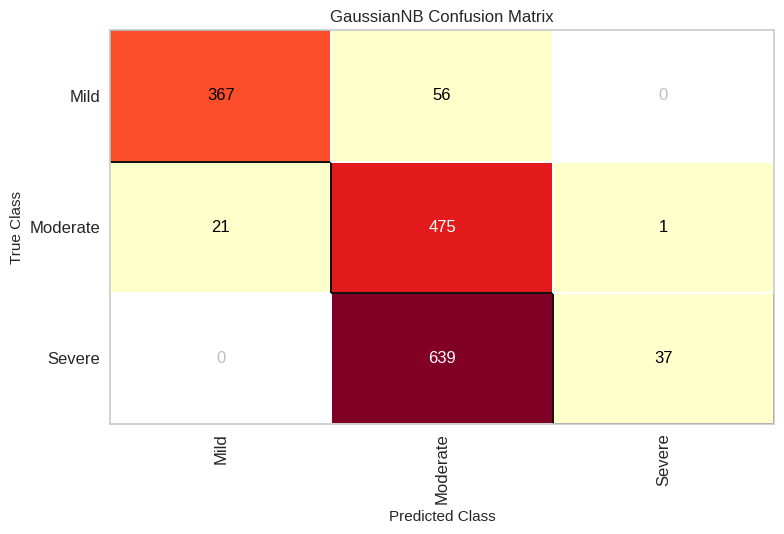

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
confusao = ConfusionMatrix(modelo)
confusao.fit(X_treinamento, y_treinamento)
confusao.score(X_teste, y_teste)
confusao.show()